In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import env

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [25]:
x = np.arange(50,150)

office_1 = stats.norm(90, 15).pdf(x)
office_2 = stats.norm(100, 20).pdf(x)

### We will use an independent T-Test here since we are comparing the means of two different groups.

### Problem sovling method:
1. Plot distributions.
2. Establish hypothesis.

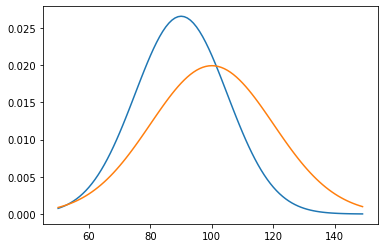

In [26]:
plt.plot(x, office_1, label= 'Office 1')
plt.plot(x, office_2, label= 'Office 2')

$H_0$ = The average time to sell homes:  $t_A$ == $t_B$

$H_a$ = The average time to sell homes:  $t_A$ !=  $t_B$

#### 3. Set significance level.

In [16]:
α = 0.05

#### 4. Verify Assumptions:

* Normal Distribution, or at least 30 observations and "kinda" normal. The more observations you have, the less "normal" it needs to appear. (CLT)
* Independent samples
* Equal Variances (or set method argument to False when not

Based on the distributions, I'm gong to assume the variances are close enough.

#### 5. Compute test statistic and probability (t-statistic & p-value) using scipy.stats.ttest_1samp

In [34]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)

In [35]:
t, p

(-2.7091418459143854, 0.00811206270346016)

In [37]:
print(f'''
Because the p-value ({p}) is less than alpha value ({α}),we reject the null hypothesis.''')


Because the p-value (0.00811206270346016) is less than alpha value (0.05),we reject the null hypothesis.
